<a href="https://colab.research.google.com/github/lemoon12/visualization/blob/master/seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# seaborn
- ref. https://seaborn.pydata.org/tutorial.html

## * 필요한 패키지와 데이터 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
tips = sns.load_dataset("tips")

## * 통계적 관계 시각화 기본
- relational plots

## 1. relplot() - scatterplot()
- relplot() default
- relplot(x=, y=, data=)
- more ref. https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot

> 변수 2개

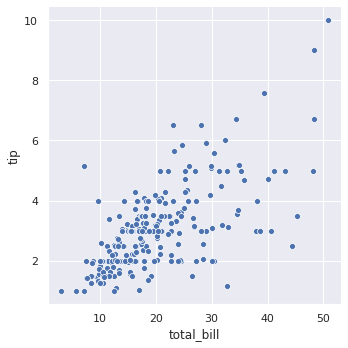

In [ ]:
sns.relplot(x="total_bill", y="tip", data=tips);

> 변수 3개
  + 색조 의미: 범주형 > 품질 팔레트(qualitative palette)

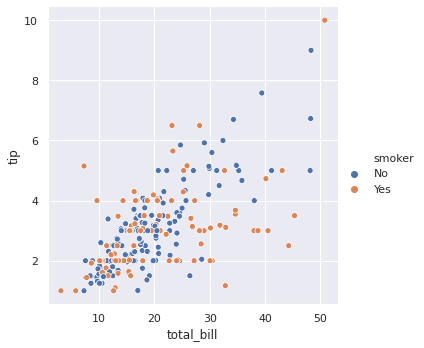

In [ ]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips); # 새로운 변수 추가(색상으로 표기-hue)

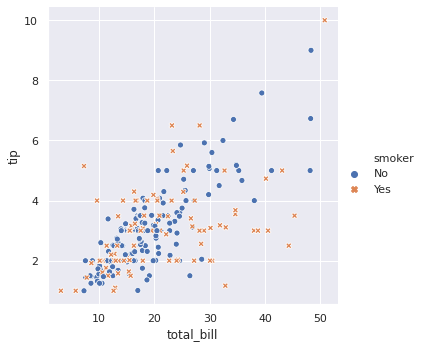

In [ ]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker",
            data=tips);

> 변수 4개

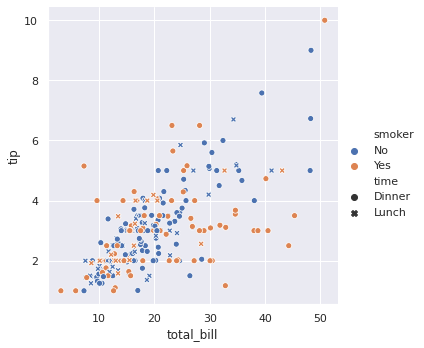

In [ ]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);

- 색조 의미: 수치형 > 순차적 팔레트(sequential palette)
  + 색상 팔레트 사용자 정의 > cubehelix_palette()

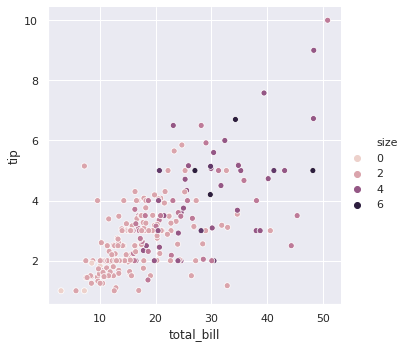

In [ ]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);

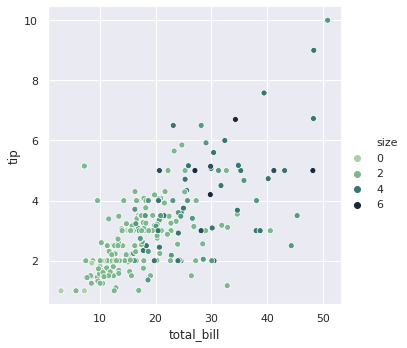

In [ ]:
sns.relplot(x="total_bill", y="tip", hue="size", palette="ch:r=-.5,l=.75", data=tips);

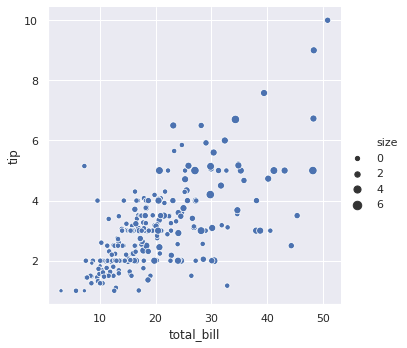

In [ ]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips);

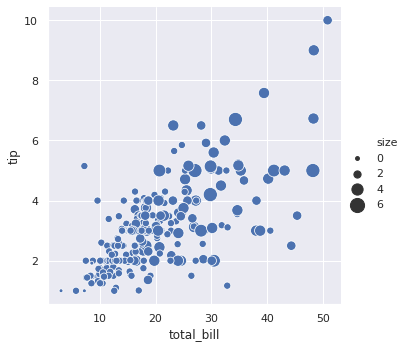

In [ ]:
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips);

## 2. relplot() - lineplot()
- 연속성 강조
- 데이터 변수의 변화: time 함수, 유사 연속 변수
- relplot(x=, y=, kind="line", data=)
  + plot이전 x 값 기준으로 데이터 정렬 > sort=False 로 비활성화 가능

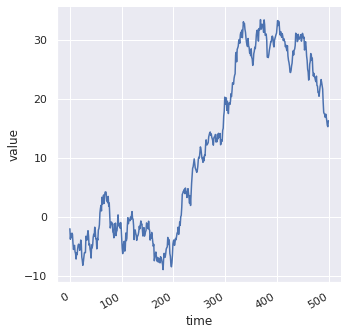

In [ ]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

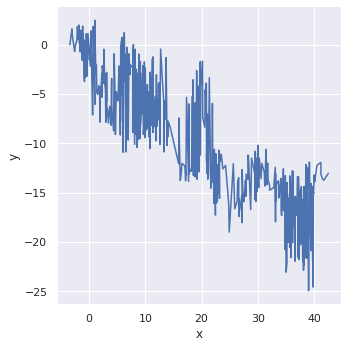

In [ ]:
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x", "y"])
sns.relplot(x="x", y="y", kind="line", data=df);

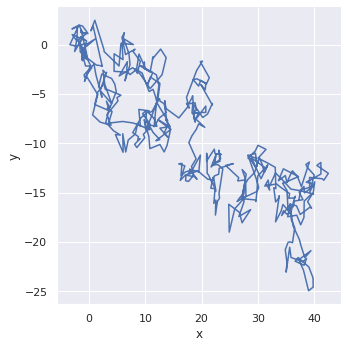

In [ ]:
sns.relplot(x="x", y="y", sort=False, kind="line", data=df);

### (1) 집계 및 불확실성 표현

- 큰 데이터:
  + 같은 x값에 대한 다양한 측정값이 존재하는 데이터셋 > 평균, 신뢰구간 95%로 구성해 집계

- 더 큰 데이터:
  + 신뢰구간 대신 표준편차로 구성 > 각 시점의 분포 산포

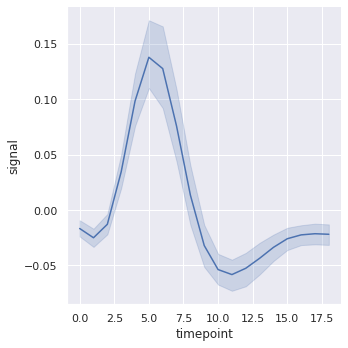

In [ ]:
fmri = sns.load_dataset("fmri")
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

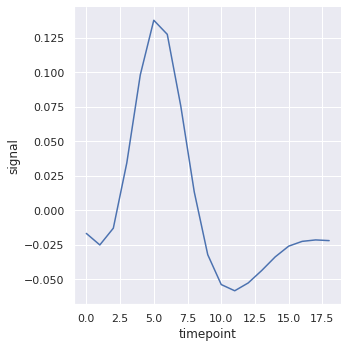

In [ ]:
# 신뢰구간 비활성화 (시간소요 방지)
sns.relplot(x="timepoint", y="signal", ci=None, kind="line", data=fmri);

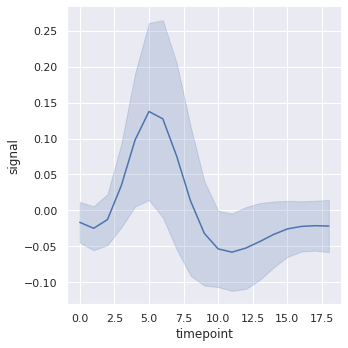

In [ ]:
# 표준편차 plotting
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri);

### (2) 하위 데이터 구성(semantic mappings_의미)

> 변수 최대 3개까지 추가가능

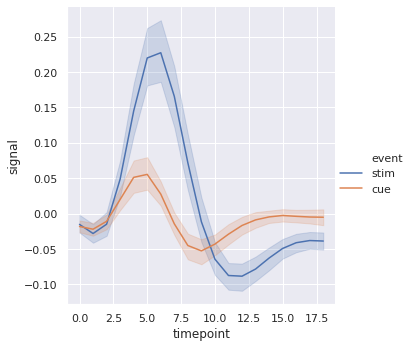

In [ ]:
# 변수 event 추가
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri);
# sns.relplot(x="timepoint", y="signal", hue="event", style="event",
#             kind="line", data=fmri);

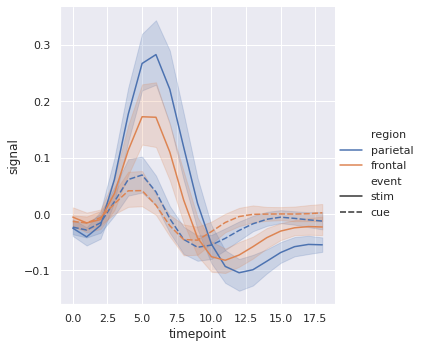

In [ ]:
# 변수 region, event 추가 (hue, style)
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            kind="line", data=fmri);
# sns.relplot(x="timepoint", y="signal", hue="region", style="event",
#             dashes=False, markers=True, kind="line", data=fmri);

- hue 컬럼이 수치형 데이터일 때

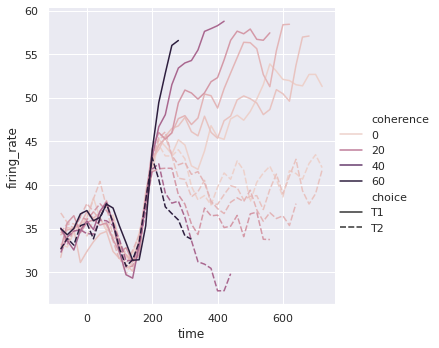

In [ ]:
dots = sns.load_dataset("dots").query("align == 'dots'")
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            kind="line", data=dots);

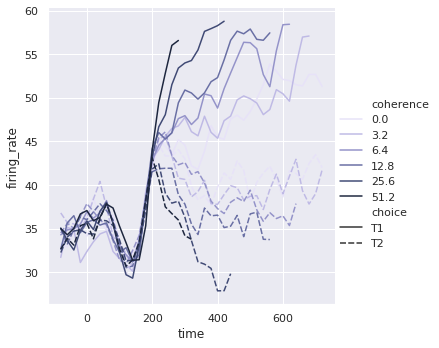

In [ ]:
# 특정 색상 지정
palette = sns.cubehelix_palette(start=2.8, rot=.1,light=.9, n_colors=6)
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            palette=palette,
            kind="line", data=dots);

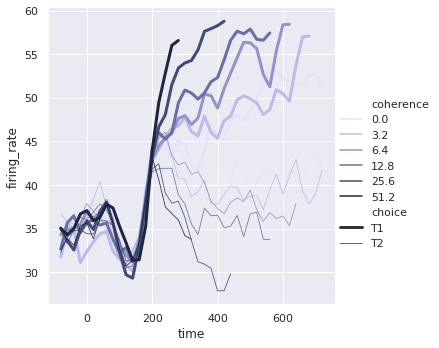

In [ ]:
# size > 범주형 변수도 가능 > 선의 변동성이 크면 좋지 않음
sns.relplot(x="time", y="firing_rate",
           hue="coherence", size="choice",
           palette=palette,
           kind="line", data=dots);

### (3) 날짜 데이터로 구성
- matplotlib의 눈금 레이블 지정 기능 활용 가능

<bound method Figure.autofmt_xdate of <Figure size 360x360 with 1 Axes>>

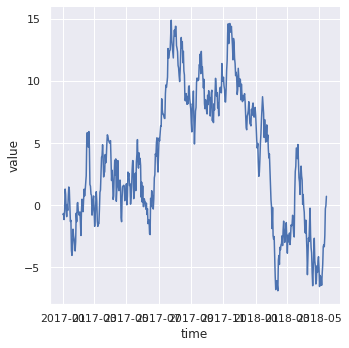

In [ ]:
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate 
# matplotlib 눈금레이블 형식

## 3. 여러 관계 표현하기(FacetGrid)
- 여러 개의 단순한 플롯이 복잡한 플롯 하나보다 효과적
- col = '변수명'
- col = '변수1', row = '변수2'
- col= '변수', col_wrap = 숫자

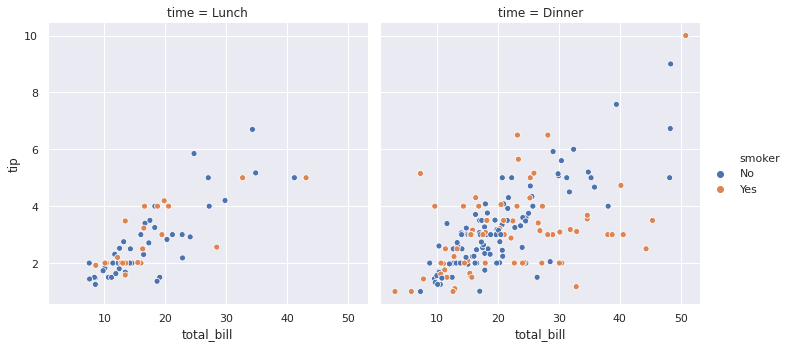

In [ ]:
sns.relplot(x='total_bill', y='tip', hue='smoker', col='time',data=tips)

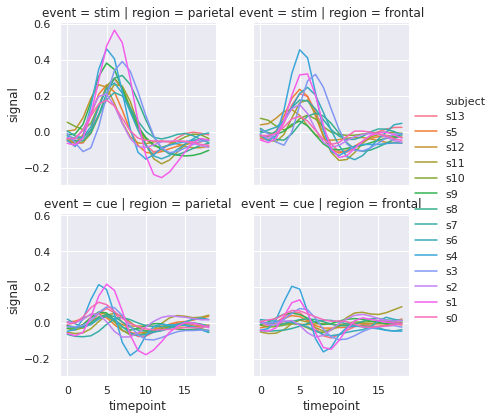

In [ ]:
fmri = sns.load_dataset("fmri")
sns.relplot(x='timepoint',y='signal', hue='subject',
            col='region',row='event',height=3,
            kind='line',estimator=None, data=fmri)

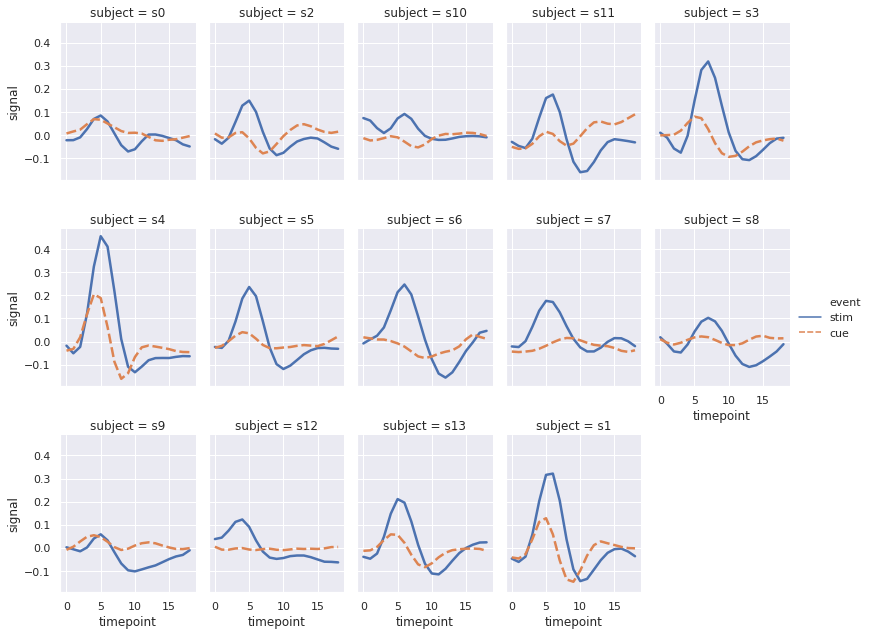

In [ ]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"));

## * 범주형 데이터 시각화 
- categorical plots
- catplot()
  + x, y, hue = 변수명
  + data = 데이터프레임
  + row, col = 데이터의 변수명
  + col_wrap = 숫자
  + estimator: 벡터를 스칼라(수치)로 변환
  + ci = 추정값 주변을 그리는 신뢰구간 크기
      (float, sd, None)
  + kind : 'point'/'bar'/'strip'/'swarm'/'box'/'violin'/'boxen'
- ref. https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

## 1. 범주형 산점도
- stripplot() : default
- swarmplot()

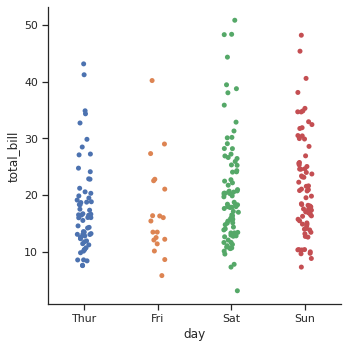

In [ ]:
tips = sns.load_dataset("tips")
sns.catplot(x="day", y="total_bill", data=tips);

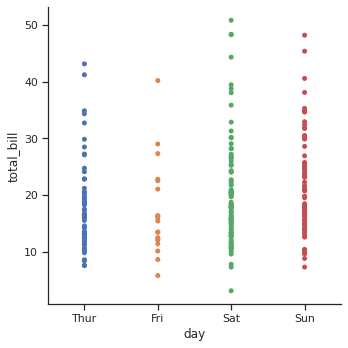

In [ ]:
# 흐트러짐 방지 - jitter=False
sns.catplot(x="day", y="total_bill", jitter=False, data=tips);

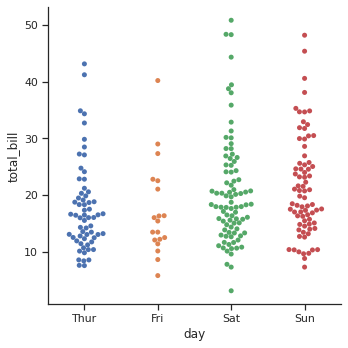

In [ ]:
# 겹침 방지 - kind='swarm'
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips);

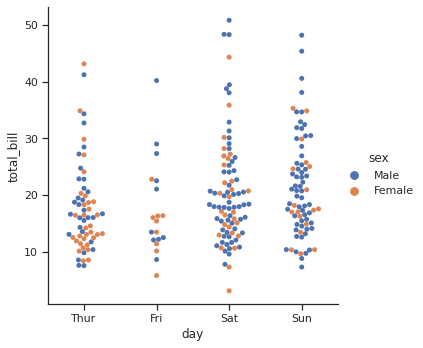

In [ ]:
# 의미변수 추가 - hue='변수명' (size, style 없음)
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips);

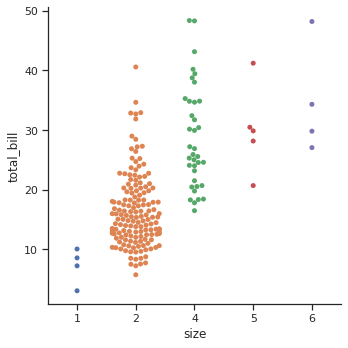

In [ ]:
# 범주형 변수 정렬 방법(숫자일 경우 자동)
sns.catplot(x="size", y="total_bill", kind="swarm",
            data=tips.query("size != 3"))

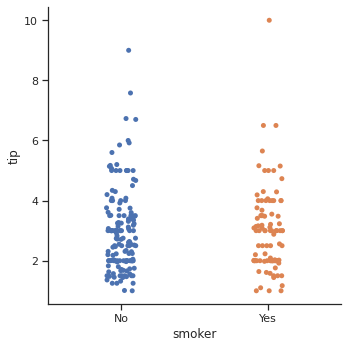

In [ ]:
# 범주형 변수 정렬 방법 - order=[,,]
sns.catplot(x="smoker", y="tip", order=["No", "Yes"], data=tips);

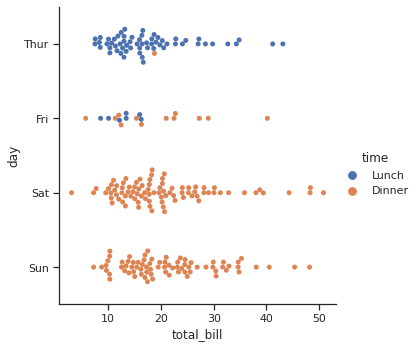

In [ ]:
# 세로 축으로 범주형 변수 배치
sns.catplot(x="total_bill", y="day", hue="time", kind="swarm", data=tips)

## 2. 범주형 분포도
- boxplot()
- violinplot()
- boxenplot()

## 3. 범주형 estimate plots
- pointplot()
- barplot()
- countplot()